## Preparing the data set

The first step before running the clustering algorithm is to prepare the training and the testing data set. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid", color_codes=True)
sns.palplot(sns.color_palette("RdBu", n_colors=7))

fileNameTrain = "C:\\Users\\sevda\\Documents\\Data Lab\\Six sigma rental property\\train.json\\train.json"
train_df = pd.read_json(fileNameTrain)

fileNameTest = "C:\\Users\\sevda\\Documents\\Data Lab\\Six sigma rental property\\test.json\\test.json"
test_df = pd.read_json(fileNameTest)



As a next step, we will extract the key words from the description variable - by key words, we define words that are in the description of the unit but are not stop words as defined by the ntlk.corpus package.

In [2]:
from nltk.corpus import stopwords

cachedStopWords = stopwords.words("english")

description_key_words_ls = []

for ind, row in train_df.iterrows():
        #print(row['features'])
        #description = description.lower()
        description = row['description'].lower().rstrip(',?!.')
        description = ' '.join([word for word in description.split() if word not in cachedStopWords])
        description_ls = description.split(" ")
        description_key_words_ls += [description_ls]

train_df['description_key_words'] = pd.Series(description_key_words_ls, index=train_df.index)

description_key_words_ls = []

for ind, row in test_df.iterrows():
        #print(row['features'])
        #description = description.lower()
        description = row['description'].lower().rstrip(',?!.')
        description = ' '.join([word for word in description.split() if word not in cachedStopWords])
        description_ls = description.split(" ")
        description_key_words_ls += [description_ls]

test_df['description_key_words'] = pd.Series(description_key_words_ls, index=test_df.index)

We will create two numeric variables which describe the number of features and number of key words in the description section

In [3]:
train_df['num_features'] = train_df.features.apply(len)
train_df['num_key_words_description'] = train_df.description_key_words.apply(len)

test_df['num_features'] = test_df.features.apply(len)
test_df['num_key_words_description'] = test_df.description_key_words.apply(len)

From the Created variable, we will extract into new variables the exact data when the listing was created, the day of year, week of year, weekday and hour.

In [4]:
train_df["created"] = pd.to_datetime(train_df["created"])
train_df["date"]= train_df["created"].dt.date

train_df["dayofyear"] = train_df["created"].dt.dayofyear
train_df["weekofyear"] = train_df["created"].dt.weekofyear
train_df["weekday"] = train_df["created"].dt.weekday
train_df["hour"] = train_df["created"].dt.hour

test_df["created"] = pd.to_datetime(test_df["created"])
test_df["date"]= test_df["created"].dt.date

test_df["dayofyear"] = test_df["created"].dt.dayofyear
test_df["weekofyear"] = test_df["created"].dt.weekofyear
test_df["weekday"] = test_df["created"].dt.weekday
test_df["hour"] = test_df["created"].dt.hour

We will also add the number of photos of each listing as a new variable in the training and testing dataframe.

In [5]:
train_df["num_photos"] = train_df["photos"].apply(len)
test_df["num_photos"] = test_df["photos"].apply(len)


As a next step in the data preparation, we will explore furthere the description of the rentals.

In [93]:
from nltk.corpus import stopwords
import re

cachedStopWords = stopwords.words("english")

description_key_words_ls = []
description_key_words_low_ls = []
description_key_words_medium_ls = []
description_key_words_high_ls = []

for ind, row in train_df.iterrows():
        #print(row['features'])
        #description = description.lower()
        #description = row['description'].lower().rstrip(',?!.-')
        description = row['description'].lower()
        description = re.sub('[\?\!\-\~\.\,\*\[\]\=\:]+', " ", description)
        description = re.sub('(<br)+', " ", description)
        description = re.sub('(<b>)', " ", description)
        description = re.sub('(\d)+', " ", description)
        description = re.sub('(/>)+', " ", description)
        description = ' '.join([word for word in description.split() if word not in cachedStopWords])
        description_ls = description.split(" ")
        description_key_words_ls += [description_ls]
        if (row['interest_level'] == "low"):
            description_key_words_low_ls += description_ls
        elif (row['interest_level'] == "medium"):
            description_key_words_medium_ls += description_ls
        elif (row['interest_level'] == "high"):
            description_key_words_high_ls += description_ls

train_df['description_key_words'] = pd.Series(description_key_words_ls, index=train_df.index)

In [89]:
print(train_df['description_key_words'].values[8])
proba = "*actual island. move-in!<br p[ubs st]eel, well-kept ~till overlooks -marble gianna bdrm barclays sleek, dropping today!text,email,fordham"
#proba = re.sub(r'^a-zA-Z*', " ", proba)
proba = re.sub('[\?\!\-\~\.\,\*\[\]]+', " ", proba)
print(proba)

proba2 = "fsfsdf <br<b> daaf <braf567 gdgf877gdgfdgd 444"
proba2 = re.sub('(\d)+', " ", proba2)
print(proba2)

['<p><a', 'website_redacted']
 actual island  move in <br p ubs st eel  well kept  till overlooks  marble gianna bdrm barclays sleek  dropping today text email fordham
fsfsdf <br<b> daaf <braf  gdgf gdgfdgd  


In [98]:
#print(train_df['description_key_words'].head())
#flattened_list = [y for x in list_of_lists for y in x]

#description_key_words_np_arr = np.array(unlist(description_key_words_ls))
#description_key_words_np_arr = description_key_words_np_arr.flatten()


#description_key_words_low_set = set(description_key_words_low_ls)
#description_key_words_medium_set = set(description_key_words_medium_ls)
#description_key_words_high_set = set(description_key_words_high_ls)

#description_medium_high_set = description_key_words_medium_set | description_key_words_high_set
#description_low_unique_set = description_key_words_low_set.difference(description_medium_high_set)

#description_medium_high_ls = [x for x in description_key_words_medium_ls if x in description_key_words_high_ls]
#description_low_unique_ls = [x for x in description_key_words_low_ls if x not in description_medium_high_ls]


#result = list(set(description_key_words_low_ls) - (set(description_key_words_medium_ls) | set(description_key_words_high_ls)))
#description_key_words_high_counter = Counter(description_key_words_high_ls)
#description_unique_key_words_low_ls = list(set(description_key_words_low_set))
#description_unique_key_words_medium_ls = list(set(description_key_words_medium_set))
#description_unique_key_words_high_ls = list(set(description_key_words_high_set))

most_common_key_words_num = 1000
from collections import Counter
description_key_words_low_counter = Counter(description_key_words_low_ls)
most_common_key_words_low_ls = list(dict(description_key_words_low_counter.most_common(most_common_key_words_num)))

description_key_words_medium_counter = Counter(description_key_words_medium_ls)
most_common_key_words_medium_ls = list(dict(description_key_words_medium_counter.most_common(most_common_key_words_num)))

description_key_words_high_counter = Counter(description_key_words_high_ls)
most_common_key_words_high_ls = list(dict(description_key_words_high_counter.most_common(most_common_key_words_num)))

description_key_words_low_only_ls = list(set(most_common_key_words_low_ls) - (set(most_common_key_words_high_ls) | set(most_common_key_words_medium_ls)))
print("LOW")
print(description_key_words_low_only_ls)

description_key_words_medium_only_ls = list(set(most_common_key_words_medium_ls) - (set(most_common_key_words_high_ls) | set(most_common_key_words_low_ls)))
print("MEDIUM")
print(description_key_words_medium_only_ls)

description_key_words_high_only_ls = list(set(most_common_key_words_high_ls) - (set(most_common_key_words_medium_ls) | set(most_common_key_words_low_ls)))
print("HIGH")
print(description_key_words_high_only_ls)

#description_medium_high_ls = [x for x in most_common_key_words_low_ls if x in most_common_key_words_high_ls]
#description_key_words_low_only_ls = [x for x in description_unique_key_words_low_ls if x not in description_medium_high_ls]

#description_low_high_ls = [x for x in description_unique_key_words_high_ls if x in description_unique_key_words_low_ls]
#description_key_words_medium_only_ls = [x for x in description_unique_key_words_medium_ls if x not in description_low_high_ls]

#description_medium_high_ls = [x for x in description_unique_key_words_medium_ls if x in description_unique_key_words_low_ls]
#description_key_words_high_only_ls = [x for x in description_unique_key_words_high_ls if x not in description_medium_high_ls]

#print(description_key_words_high_only_ls)
print(description_key_words_high_counter.most_common(500))

LOW
['blah', 'homes', 'floors;', 'zero', 'description', 'habitats', 'sophisticated', "manhattan's", 'area/neighborhood', 'match', 'shaker', 'com/associates;', 'attend', 'warm', 'anything', 'interior', 'emporium', 'and/or', 'inquire', 'seating', 'golf', 'shades', 'appointed', 'com;', 'mosaic', 'flat', 'cooler', 'updates', 'upscale', 'something', 'com/testimonials', 'disclosure', 'links', 'cannot', 'reviews', 'rich', 'bohemia', 'website', 'flooded', 'online;', 'w/d', 'lap', 'lets', 'sure', 'read', 'individual', 'penthouse', 'en', 'hall', 'construction', 'hgrny', 'associate', 'offered', 'grills', 'seminar', 'shop', 'backsplash', 'buying', 'tal', 'doorstep', 'deals/management', 'know', 'com/searchrentals;', 'chic', 'helpful', 'com/vas', 'vas', 'h', 'vanities', 'working', 'com/buyingseminar;', 'grill', '++', 'c&amp;c']
MEDIUM
['run', 'junior', 'pharmacies', 'virtual', 'group', 'rain', 'gigantic', 'anywhere', 'av', 'incomparable', 'installed', 'allows', 'zack', 'bed/', 'penn', 'centrally', '

In [28]:
print(description_key_words_low_counter)

Counter({'/><br': 76075, 'website_redacted': 23991, 'apartment': 21859, 'new': 17639, 'building': 15906, 'bedroom': 14569, 'kitchen': 14558, 'hardwood': 11230, 'stainless': 11016, 'steel': 10888, '-': 10540, '/><p><a': 10425, 'great': 9954, 'large': 9951, 'renovated': 9579, '&': 9109, 'living': 9091, 'call': 9065, 'features': 8934, '2': 8858, 'located': 8794, 'high': 8697, 'full': 8596, 'one': 8103, 'laundry': 7883, 'granite': 7705, 'marble': 7695, '1': 7618, 'room': 7156, 'contact': 7004, 'private': 6856, 'york': 6772, 'email': 6759, 'beautiful': 6429, 'closet': 6398, 'access': 6392, 'spacious': 6307, 'east': 6169, 'real': 6098, 'floors,': 5899, 'unit': 5807, 'luxury': 5691, 'estate': 5554, 'appliances': 5451, 'broker': 5320, 'central': 5124, 'bathroom': 5068, 'schedule': 5014, 'information': 5010, 'room,': 5008, 'appliances,': 4878, 'space': 4834, 'fitness': 4831, 'windows': 4667, 'floor': 4561, 'kagglemanager@renthop.com': 4500, 'including': 4413, 'west': 4303, 'equal': 4294, 'studi

In [6]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

alg = XGBClassifier(
                     learning_rate =0.1,
                     n_estimators=1000,
                     max_depth=5,
                     min_child_weight=1,
                     gamma=0,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective= 'multi:softprob; num_class=3',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27)
    
def modelXGBfit(alg, train_df, test_df, predictors, target, target_num_map, cv_folds=5, early_stopping_rounds=50):
    
   
    
    #Fit the algorithm on the data
    #alg.set_params(n_estimators = 3)
    train_target = pd.DataFrame(train_df['interest_level'].apply(lambda x: target_num_map[x]))
    alg.fit(train_df[predictors], train_target)
        
    #Predict training set:
    train_predictions = alg.predict(train_df[predictors])
    train_predprob = alg.predict_proba(train_df[predictors])
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(train_target, train_predictions))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    plt.show()
    
    #Predicting on the test data set
    test_predictions = alg.predict(test_df[predictors])
    test_predprob = alg.predict_proba(test_df[predictors])
    return test_predictions, test_predprob, alg


C:\Users\sevda\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\sevda\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


We will use the modelXGBfit function to run the model. The function defines some of the paramteres needed by the xgboost algorithm. We will apply the algorithm to the train data set with the pre selected variables and target variable "interest_level".

In [8]:
print(train_df.head())

        bathrooms  bedrooms                       building_id  \
10            1.5         3  53a5b119ba8f7b61d4e010512e0dfc85   
10000         1.0         2  c5c8a357cba207596b04d1afd1e4f130   
100004        1.0         1  c3ba40552e2120b0acfc3cb5730bb2aa   
100007        1.0         1  28d9ad350afeaab8027513a3e52ac8d5   
100013        1.0         4                                 0   

                   created                                        description  \
10     2016-06-24 07:54:24  A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...   
10000  2016-06-12 12:19:27                                                      
100004 2016-04-17 03:26:41  Top Top West Village location, beautiful Pre-w...   
100007 2016-04-18 02:22:02  Building Amenities - Garage - Garden - fitness...   
100013 2016-04-28 01:32:41  Beautifully renovated 3 bedroom flex 4 bedroom...   

            display_address  \
10      Metropolitan Avenue   
10000       Columbus Avenue   
100004          W 13 Street  


Model Report
Accuracy : 0.8607


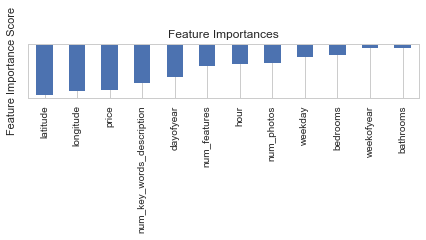

In [9]:
selected_vars  = ["bathrooms", "bedrooms", "price", "num_features", "num_key_words_description",
                   "dayofyear", "weekofyear", "weekday", "hour", "num_photos", "latitude", "longitude"]

#neighbourhood_dummies = list(set(neighbourhood_dummies_train) & set(neighbourhood_dummies_test))
#selected_vars.extend(list(neighbourhood_dummies))

target = "interest_level"
target_num_map = {'high':0, 'medium':1, 'low':2}

test_prediction, test_predprob, alg = modelXGBfit (alg, train_df, test_df, selected_vars, target, target_num_map)

Based on the XGBoost algorithm which was trained on the train_df data set, we can see that the trained model has accuracy of 81%. And the strongest predictors used by the model are: price, nm of key words in the desciption (or in other words how long is the description when the stp wprds are removed), day of the year, number of features, hour. Weekday, bedrooms and bathrooms are with less important function when predicting the probabilities the interest level.

In [10]:
out_df = pd.DataFrame(test_predprob)
out_df.columns = ["high", "medium", "low"]
out_df["listing_id"] = test_df.listing_id.values
print(out_df.head())

       high    medium       low  listing_id
0  0.084935  0.638936  0.276129     7142618
1  0.573042  0.207019  0.219939     7210040
2  0.009495  0.078752  0.911753     7103890
3  0.028089  0.282081  0.689830     7143442
4  0.008873  0.165688  0.825439     6860601


As a next step we will perform cross validation and some fine tuning to the parameters of XGBoost.

##Tune max_depth and min_child_weight

Both parameters are important in the model performance and that's the reason we start with them.

In [12]:
param_test1 = {
 'max_depth': [3, 7, 11],
 'min_child_weight': [1, 3, 5]
}

selected_vars  = ["bathrooms", "bedrooms", "price", "num_features", "num_key_words_description",
                   "dayofyear", "weekofyear", "weekday", "hour", "num_photos", "latitude", "longitude"]

target = "interest_level"
target_num_map = {'high':0, 'medium':1, 'low':2}

train_target = pd.DataFrame(train_df['interest_level'].apply(lambda x: target_num_map[x]))
    
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1,scoring='log_loss', n_jobs=4,iid=False, cv=5)
gsearch1.fit(train_df[selected_vars],train_target.values.flatten())
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: -0.62501, std: 0.00457, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: -0.62494, std: 0.00458, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: -0.62494, std: 0.00442, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: -0.59346, std: 0.00484, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: -0.59296, std: 0.00450, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: -0.59307, std: 0.00467, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: -0.60889, std: 0.00623, params: {'max_depth': 11, 'min_child_weight': 1},
  mean: -0.60224, std: 0.00567, params: {'max_depth': 11, 'min_child_weight': 3},
  mean: -0.59943, std: 0.00579, params: {'max_depth': 11, 'min_child_weight': 5}],
 {'max_depth': 7, 'min_child_weight': 3},
 -0.5929554566132762)

We will try to further adjust the max_depth based oon the result by looking at other numbers around the final result 7. We will aslo try to adjust further th ethe min_child_weight which was initially set to 3.

In [13]:
param_test1 = {
 'max_depth': [6, 7, 8],
 'min_child_weight': [2,3, 4]
}

train_target = pd.DataFrame(train_df['interest_level'].apply(lambda x: target_num_map[x]))
    
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1,scoring='log_loss', n_jobs=4,iid=False, cv=5)
gsearch1.fit(train_df[selected_vars],train_target.values.flatten())
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: -0.59533, std: 0.00474, params: {'max_depth': 6, 'min_child_weight': 2},
  mean: -0.59566, std: 0.00488, params: {'max_depth': 6, 'min_child_weight': 3},
  mean: -0.59577, std: 0.00418, params: {'max_depth': 6, 'min_child_weight': 4},
  mean: -0.59320, std: 0.00466, params: {'max_depth': 7, 'min_child_weight': 2},
  mean: -0.59296, std: 0.00450, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: -0.59318, std: 0.00500, params: {'max_depth': 7, 'min_child_weight': 4},
  mean: -0.59351, std: 0.00474, params: {'max_depth': 8, 'min_child_weight': 2},
  mean: -0.59309, std: 0.00449, params: {'max_depth': 8, 'min_child_weight': 3},
  mean: -0.59258, std: 0.00470, params: {'max_depth': 8, 'min_child_weight': 4}],
 {'max_depth': 8, 'min_child_weight': 4},
 -0.5925841118459)

Since we've got as a result 8, we will try again with few other max depth values: 8,9,10 to see if we can find a better fit. The min_child_weight will be again 2 or 3

In [14]:
param_test1 = {
 'max_depth': [7,8,9,10],
 'min_child_weight': [4,5,6]
}

train_target = pd.DataFrame(train_df['interest_level'].apply(lambda x: target_num_map[x]))
    
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1,scoring='log_loss', n_jobs=4,iid=False, cv=5)
gsearch1.fit(train_df[selected_vars],train_target.values.flatten())
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: -0.59318, std: 0.00500, params: {'max_depth': 7, 'min_child_weight': 4},
  mean: -0.59307, std: 0.00467, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: -0.59321, std: 0.00421, params: {'max_depth': 7, 'min_child_weight': 6},
  mean: -0.59258, std: 0.00470, params: {'max_depth': 8, 'min_child_weight': 4},
  mean: -0.59230, std: 0.00460, params: {'max_depth': 8, 'min_child_weight': 5},
  mean: -0.59255, std: 0.00422, params: {'max_depth': 8, 'min_child_weight': 6},
  mean: -0.59337, std: 0.00512, params: {'max_depth': 9, 'min_child_weight': 4},
  mean: -0.59360, std: 0.00478, params: {'max_depth': 9, 'min_child_weight': 5},
  mean: -0.59318, std: 0.00467, params: {'max_depth': 9, 'min_child_weight': 6},
  mean: -0.59623, std: 0.00567, params: {'max_depth': 10, 'min_child_weight': 4},
  mean: -0.59533, std: 0.00468, params: {'max_depth': 10, 'min_child_weight': 5},
  mean: -0.59518, std: 0.00474, params: {'max_depth': 10, 'min_child_weight': 6}],
 {'max_depth': 8, 'min_c

 From the results we can see that the optimal value for max depth is 8. Our cross validation was focused on consequitive values between 3 and 11. The optimal value for the minimum child weight is 1. The values for the minimum child weight that we considered were 1, 3 and 5. Since the optimum values are in the middle or the lower end of the intervals we have tested, we will accept max depth = 9 and min child weight = 5 as the best values and will proceed with the rest of the parameter tuning by using these values.

In [15]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=8,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='log_loss', n_jobs=4,iid=False, cv=5)
gsearch3.fit(train_df[selected_vars],train_target.values.flatten())
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: -0.59230, std: 0.00460, params: {'gamma': 0.0},
  mean: -0.59249, std: 0.00482, params: {'gamma': 0.1},
  mean: -0.59238, std: 0.00493, params: {'gamma': 0.2},
  mean: -0.59236, std: 0.00421, params: {'gamma': 0.3},
  mean: -0.59239, std: 0.00493, params: {'gamma': 0.4}],
 {'gamma': 0.0},
 -0.5922969618316679)

We can see that the best gamma value for our data set is 0.1 and not 0 as we initially have selected. We will update the parameters and will run the whole model to see how the updated parameters have affected the final result.


Model Report
Accuracy : 0.983


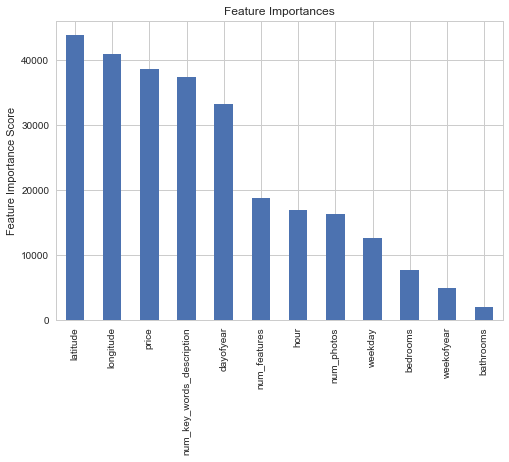

In [16]:
alg = XGBClassifier(
                     learning_rate =0.1,
                     n_estimators=1000,
                     max_depth=8,
                     min_child_weight=5,
                     gamma=0,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective= 'multi:softprob; num_class=3',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27)

test_prediction, test_predprob, alg_result = modelXGBfit (alg, train_df, test_df, selected_vars, target, target_num_map)

We can see that by adjusting the above parameters, we have increased the accuracy of the model from 0.8116 to 0.9751. As a next step we will adjust the "subsample" and "colsample_bytree" parameters.

In [17]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,8)],
 'colsample_bytree':[i/10.0 for i in range(6,8)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=8,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='log_loss', n_jobs=4,iid=False, cv=5)
gsearch4.fit(train_df[selected_vars],train_target.values.flatten())
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: -0.59472, std: 0.00580, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: -0.59550, std: 0.00563, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: -0.59310, std: 0.00588, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: -0.59288, std: 0.00526, params: {'colsample_bytree': 0.7, 'subsample': 0.7}],
 {'colsample_bytree': 0.7, 'subsample': 0.7},
 -0.5928809483851276)

We found that the best values are "colsample_bytree" = 0.7 and subsample = 0.7. As a next step we will tune the regularization parameters. The next step is to tune the regularization parameters.

In [19]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
selected_vars  = ["bathrooms", "bedrooms", "price", "num_features", "num_key_words_description",
                   "dayofyear", "weekofyear", "weekday", "hour", "num_photos", "latitude", "longitude"]

target = "interest_level"
target_num_map = {'high':0, 'medium':1, 'low':2}

train_target = pd.DataFrame(train_df['interest_level'].apply(lambda x: target_num_map[x]))
    
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=8,
 min_child_weight=5, gamma=0, subsample=0.7, colsample_bytree=0.7,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='log_loss', n_jobs=4,iid=False, cv=5)
gsearch6.fit(train_df[selected_vars],train_target.values.flatten())
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: -0.59344, std: 0.00567, params: {'reg_alpha': 1e-05},
  mean: -0.59346, std: 0.00531, params: {'reg_alpha': 0.01},
  mean: -0.59276, std: 0.00481, params: {'reg_alpha': 0.1},
  mean: -0.59262, std: 0.00596, params: {'reg_alpha': 1},
  mean: -0.64218, std: 0.00378, params: {'reg_alpha': 100}],
 {'reg_alpha': 1},
 -0.5926224796744195)

We've got a slight improvement in the cv score compared to the previous parameters. Since our reg_alpha values were pretty wide spread, we will focus on values around 1 to see if we can find an even better adjusted value for reg_alpha.

In [20]:
#Have to remove this code because we found alpha in the previous one
param_test6 = {
 'reg_alpha':[0.5, 1, 3, 5, 10]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=9,
 min_child_weight=5, gamma=0, subsample=0.7, colsample_bytree=0.7,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='log_loss', n_jobs=4,iid=False, cv=5)
gsearch6.fit(train_df[selected_vars],train_target.values.flatten())
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: -0.59535, std: 0.00576, params: {'reg_alpha': 0.5},
  mean: -0.59476, std: 0.00575, params: {'reg_alpha': 1},
  mean: -0.59308, std: 0.00510, params: {'reg_alpha': 3},
  mean: -0.59302, std: 0.00455, params: {'reg_alpha': 5},
  mean: -0.59577, std: 0.00495, params: {'reg_alpha': 10}],
 {'reg_alpha': 5},
 -0.5930228275842985)

We can see that a better reg alpha parameter is 0.05 and it leads to slightly improvement in the cross validation results. Since we adjusted few more parameters of the model, it is time to see again our model performance. 


Model Report
Accuracy : 0.93


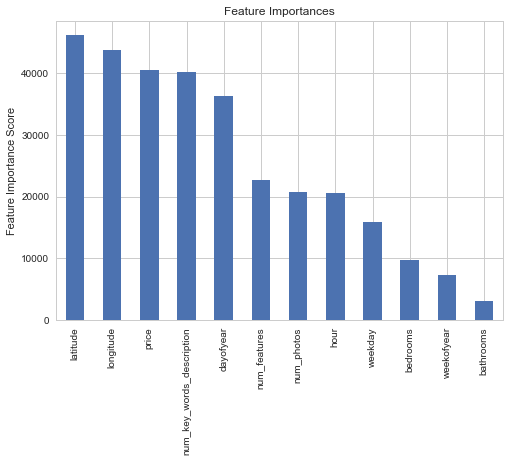

In [21]:
alg = XGBClassifier(
                     learning_rate =0.1,
                     n_estimators=1000,
                     max_depth=8,
                     min_child_weight=5,
                     gamma=0,
                     subsample=0.7,
                     colsample_bytree=0.7,
                     reg_alpha = 5,
                     objective= 'multi:softprob; num_class=3',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27)

test_prediction, test_predprob, alg_result = modelXGBfit (alg, train_df, test_df, selected_vars, target, target_num_map)

In [22]:
out_df = pd.DataFrame(test_predprob)
out_df.columns = ["high", "medium", "low"]
out_df["listing_id"] = test_df.listing_id.values
out_df.to_csv("xgb_starter_results_v2.csv", index=False)